# 1. K-means

Cluster Labels: [0 1 0 1 1 0]
Centroids:
 [[2.         0.66666667]
 [3.         3.33333333]]


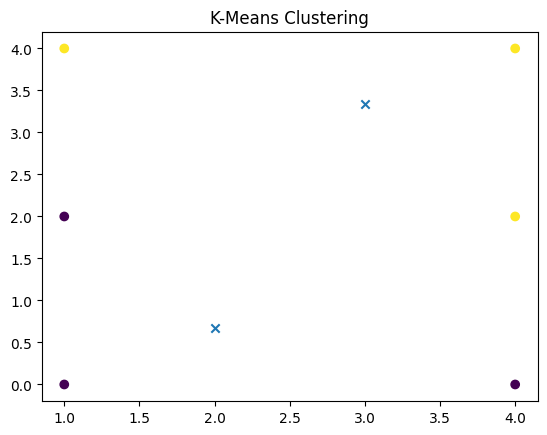

In [1]:
# Import required libraries
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample dataset
X = np.array([
    [1, 2],
    [1, 4],
    [1, 0],
    [4, 2],
    [4, 4],
    [4, 0]
])

# Create KMeans object
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit model
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

# Get centroids
centroids = kmeans.cluster_centers_

# Print results
print("Cluster Labels:", labels)
print("Centroids:\n", centroids)

# Plot clusters
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x')
plt.title("K-Means Clustering")
plt.show()


# 2. Fuzzy c-means

Cluster Centers:
 [[1.16983765 1.94566921]
 [3.83016235 2.05433079]]
Membership Matrix:
 [[0.99604744 0.73516769 0.76225763 0.00395256 0.23774237 0.26483231]
 [0.00395256 0.26483231 0.23774237 0.99604744 0.76225763 0.73516769]]
Final Cluster Labels: [0 0 0 1 1 1]


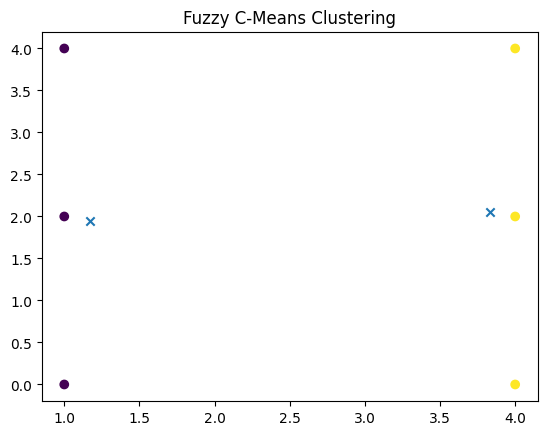

In [2]:
# Import libraries
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Sample dataset
X = np.array([
    [1, 2],
    [1, 4],
    [1, 0],
    [4, 2],
    [4, 4],
    [4, 0]
])

# Transpose data (required by scikit-fuzzy)
data = X.T

# Number of clusters
c = 2

# Apply Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data,          # dataset
    c,             # number of clusters
    m=2,            # fuzziness coefficient
    error=0.005,    # stopping condition
    maxiter=1000,   # max iterations
    init=None
)

# Hard clustering (maximum membership)
labels = np.argmax(u, axis=0)

# Print results
print("Cluster Centers:\n", cntr)
print("Membership Matrix:\n", u)
print("Final Cluster Labels:", labels)

# Plot result
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(cntr[:, 0], cntr[:, 1], marker='x')
plt.title("Fuzzy C-Means Clustering")
plt.show()

# 3. Agnes

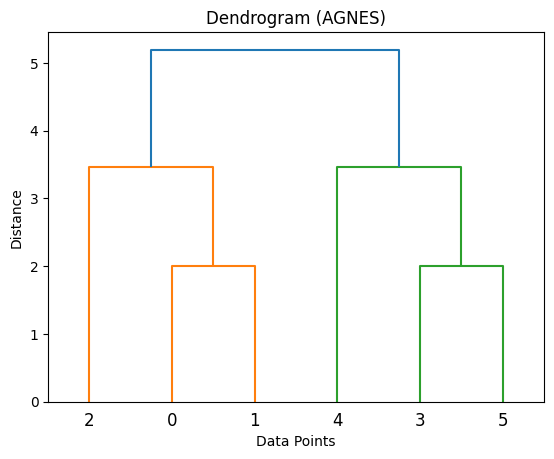

Cluster Labels: [1 1 1 0 0 0]


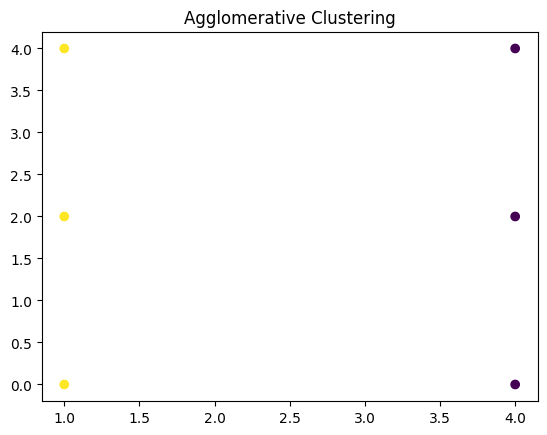

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Sample dataset
X = np.array([
    [1, 2],
    [1, 4],
    [1, 0],
    [4, 2],
    [4, 4],
    [4, 0]
])

# -------------------------------
# Part 1: Dendrogram
# -------------------------------

# Create linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure()
dendrogram(Z)
plt.title("Dendrogram (AGNES)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# -------------------------------
# Part 2: Agglomerative Clustering
# -------------------------------

# Create model
model = AgglomerativeClustering(
    n_clusters=2,
    linkage='ward'
)

# Fit model
labels = model.fit_predict(X)

# Print labels
print("Cluster Labels:", labels)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative Clustering")
plt.show()

# 4. ID3

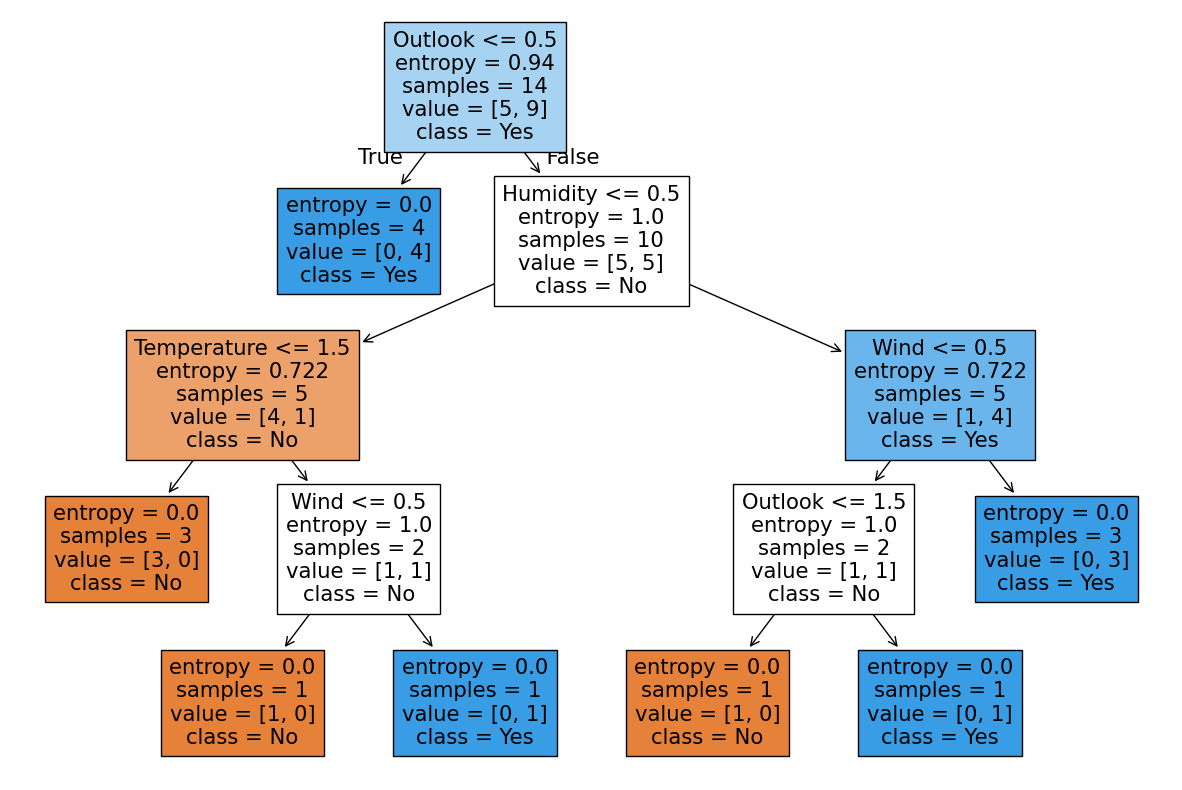

In [4]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Create Dataset
# -----------------------------

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast',
                'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],

    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild',
                    'Cool', 'Mild', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],

    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'High',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],

    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
             'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],

    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                   'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# -----------------------------
# Step 2: Encode Categorical Data
# -----------------------------

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

# -----------------------------
# Step 3: Split Input & Output
# -----------------------------

X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

# -----------------------------
# Step 4: Create ID3 Model
# -----------------------------

model = DecisionTreeClassifier(
    criterion='entropy'
)

# Train model
model.fit(X, y)

# -----------------------------
# Step 5: Visualize Tree
# -----------------------------

plt.figure(figsize=(15, 10))

tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True
)

plt.show()

# 5. Cart

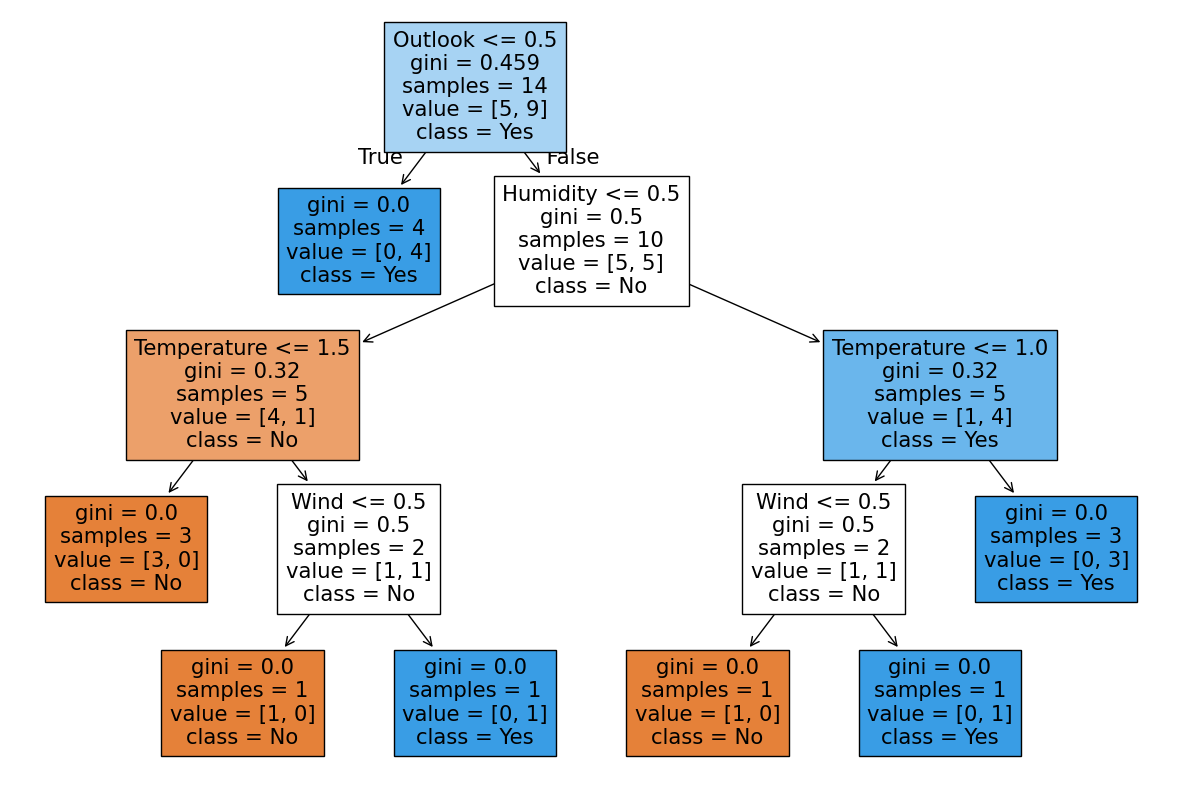

In [5]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Create Dataset
# -----------------------------

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast',
                'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],

    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild',
                    'Cool', 'Mild', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],

    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'High',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],

    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
             'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],

    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                   'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# -----------------------------
# Step 2: Encode Data
# -----------------------------

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

# -----------------------------
# Step 3: Input & Output
# -----------------------------

X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

# -----------------------------
# Step 4: Create CART Model
# -----------------------------

model = DecisionTreeClassifier(
    criterion='gini'   # CART uses Gini
)

# Train
model.fit(X, y)

# -----------------------------
# Step 5: Visualize Tree
# -----------------------------

plt.figure(figsize=(15, 10))

tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True
)

plt.show()

# 6. Naive Bayes

In [6]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# -----------------------------
# Step 1: Create Dataset
# -----------------------------

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast',
                'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],

    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild',
                    'Cool', 'Mild', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],

    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'High',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],

    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
             'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],

    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                   'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# -----------------------------
# Step 2: Encode Categorical Data
# -----------------------------

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

# -----------------------------
# Step 3: Split Input & Output
# -----------------------------

X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

# -----------------------------
# Step 4: Train-Test Split
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -----------------------------
# Step 5: Create Naive Bayes Model
# -----------------------------

model = GaussianNB()

# Train model
model.fit(X_train, y_train)

# -----------------------------
# Step 6: Prediction
# -----------------------------

y_pred = model.predict(X_test)

# -----------------------------
# Step 7: Accuracy
# -----------------------------

acc = accuracy_score(y_test, y_pred)

print("Predicted Values:", y_pred)
print("Actual Values:   ", y_test.values)
print("Accuracy:", acc)

Predicted Values: [1 0 0 1 1]
Actual Values:    [1 1 0 1 0]
Accuracy: 0.6


# 7. Perceptron Learning

In [20]:
# Import libraries
import numpy as np
from sklearn.linear_model import Perceptron

# -----------------------------
# Step 1: Input Data
# -----------------------------

# Inputs for logic gates
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# AND Gate Output
y_and = np.array([0, 0, 0, 1])

# OR Gate Output
y_or = np.array([0, 1, 1, 1])

# NAND Gate Output
y_nand = np.array([1, 1, 1, 0])


# -----------------------------
# Step 2: Train AND Gate
# -----------------------------

and_model = Perceptron()

and_model.fit(X, y_and)

print("AND Gate Prediction:")
print(and_model.predict(X))


# -----------------------------
# Step 3: Train OR Gate
# -----------------------------

or_model = Perceptron()

or_model.fit(X, y_or)

print("OR Gate Prediction:")
print(or_model.predict(X))


# -----------------------------
# Step 4: Train NAND Gate
# -----------------------------

nand_model = Perceptron()

nand_model.fit(X, y_nand)

print("NAND Gate Prediction:")
print(nand_model.predict(X))

AND Gate Prediction:
[0 0 0 1]
OR Gate Prediction:
[0 1 1 1]
NAND Gate Prediction:
[1 0 0 0]


In [21]:
# 7.1 Perceptron Graph

AND Gate Prediction: [0 0 0 1]


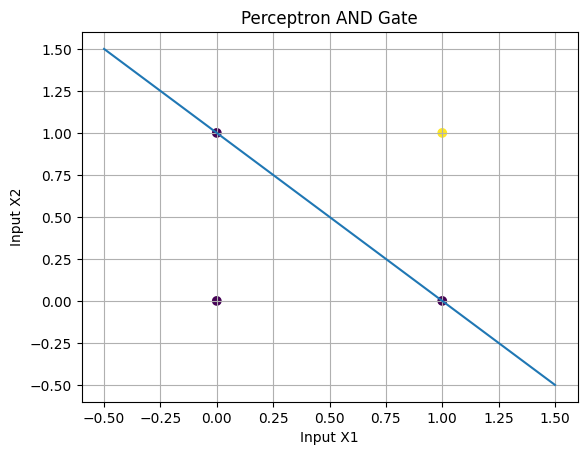

OR Gate Prediction: [0 1 1 1]


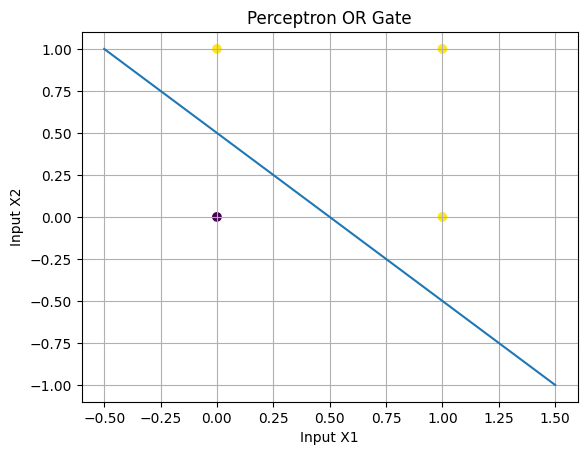

NAND Gate Prediction: [1 0 0 0]


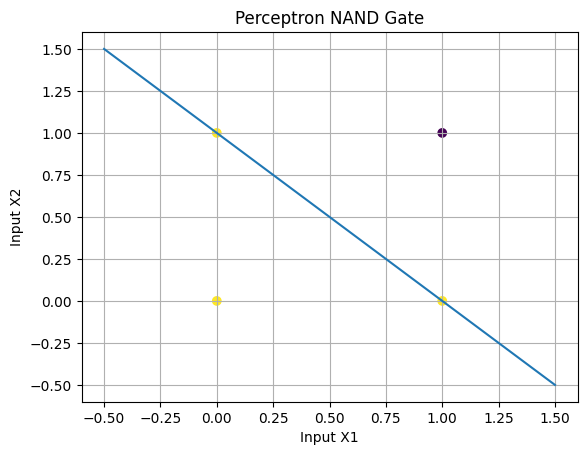

In [22]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron


# -----------------------------
# Step 1: Input Data
# -----------------------------

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1])
y_nand = np.array([1, 1, 1, 0])


# -----------------------------
# Function to Plot Boundary
# -----------------------------

def plot_boundary(model, X, y, title):

    # Plot points
    plt.scatter(X[:, 0], X[:, 1], c=y)

    # Get weights
    w = model.coef_[0]
    b = model.intercept_[0]

    # Decision line: w1*x + w2*y + b = 0
    x_vals = np.array([-0.5, 1.5])
    y_vals = -(w[0]*x_vals + b) / w[1]

    # Plot line
    plt.plot(x_vals, y_vals)

    plt.xlabel("Input X1")
    plt.ylabel("Input X2")
    plt.title(title)
    plt.grid()
    plt.show()


# -----------------------------
# Step 2: AND Gate
# -----------------------------

and_model = Perceptron()
and_model.fit(X, y_and)

print("AND Gate Prediction:", and_model.predict(X))

plot_boundary(and_model, X, y_and, "Perceptron AND Gate")


# -----------------------------
# Step 3: OR Gate
# -----------------------------

or_model = Perceptron()
or_model.fit(X, y_or)

print("OR Gate Prediction:", or_model.predict(X))

plot_boundary(or_model, X, y_or, "Perceptron OR Gate")


# -----------------------------
# Step 4: NAND Gate
# -----------------------------

nand_model = Perceptron()
nand_model.fit(X, y_nand)

print("NAND Gate Prediction:", nand_model.predict(X))

plot_boundary(nand_model, X, y_nand, "Perceptron NAND Gate")

# 8. Backpropagation

Predicted: [1 1 0 1 1]
Actual:    [1 1 0 1 0]
Accuracy: 0.8

Confusion Matrix:
 [[1 1]
 [0 3]]


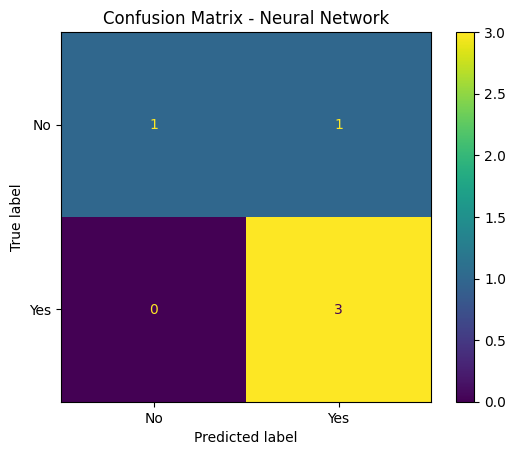

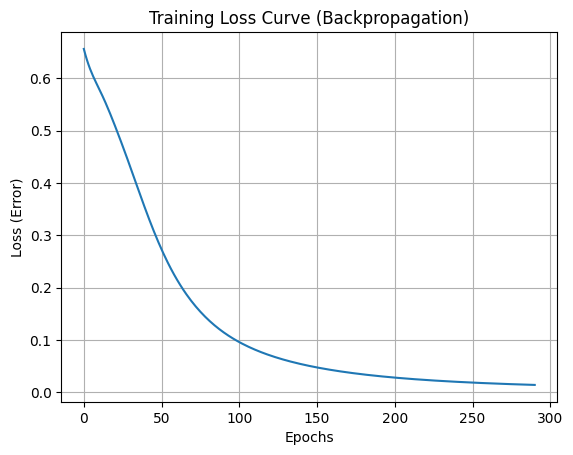

In [17]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# -----------------------------
# Step 1: Create Dataset
# -----------------------------

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast',
                'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],

    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild',
                    'Cool', 'Mild', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],

    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'High',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],

    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
             'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],

    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                   'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)


# -----------------------------
# Step 2: Encode Data
# -----------------------------

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])


# -----------------------------
# Step 3: Input & Output
# -----------------------------

X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']


# -----------------------------
# Step 4: Train-Test Split
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# -----------------------------
# Step 5: Feature Scaling (Important)
# -----------------------------

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# -----------------------------
# Step 6: Create MLP Model
# -----------------------------

model = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='logistic',
    solver='adam',          # Better than sgd
    learning_rate_init=0.01,
    max_iter=2000,
    random_state=42
)


# -----------------------------
# Step 7: Train Model
# -----------------------------

model.fit(X_train, y_train)


# -----------------------------
# Step 8: Prediction
# -----------------------------

y_pred = model.predict(X_test)


# -----------------------------
# Step 9: Accuracy
# -----------------------------

acc = accuracy_score(y_test, y_pred)

print("Predicted:", y_pred)
print("Actual:   ", y_test.values)
print("Accuracy:", acc)


# -----------------------------
# Step 10: Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No", "Yes"]
)

disp.plot()
plt.title("Confusion Matrix - Neural Network")
plt.show()


# -----------------------------
# Step 11: Loss Curve (Training Error Graph)
# -----------------------------

plt.plot(model.loss_curve_)

plt.xlabel("Epochs")
plt.ylabel("Loss (Error)")
plt.title("Training Loss Curve (Backpropagation)")

plt.grid()
plt.show()

# 9. MADALINE

In [11]:
# Import libraries
import numpy as np
from sklearn.linear_model import SGDClassifier

# -----------------------------
# Step 1: Input Data (XOR)
# -----------------------------

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# XOR Output
y = np.array([0, 1, 1, 0])

# -----------------------------
# Step 2: Create Multiple ADALINE Units
# -----------------------------

# First hidden neuron
n1 = SGDClassifier(
    loss='squared_error',   # LMS Rule
    learning_rate='constant',
    eta0=0.01,
    max_iter=2000,
    random_state=1
)

# Second hidden neuron
n2 = SGDClassifier(
    loss='squared_error',
    learning_rate='constant',
    eta0=0.01,
    max_iter=2000,
    random_state=2
)

# -----------------------------
# Step 3: Train Hidden Neurons
# -----------------------------

n1.fit(X, y)
n2.fit(X, y)

# -----------------------------
# Step 4: Combine Outputs
# -----------------------------

h1 = n1.predict(X)
h2 = n2.predict(X)

# Combine hidden outputs
H = np.column_stack((h1, h2))

# -----------------------------
# Step 5: Output Neuron
# -----------------------------

output = SGDClassifier(
    loss='log_loss',
    max_iter=2000,
    random_state=3
)

output.fit(H, y)

# -----------------------------
# Step 6: Prediction
# -----------------------------

pred = output.predict(H)

print("Input:")
print(X)

print("Predicted Output:")
print(pred)

print("Actual Output:")
print(y)

Input:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predicted Output:
[0 0 0 0]
Actual Output:
[0 1 1 0]


# 10. Genetic Algorithm

In [12]:
# Import libraries
import random

# -----------------------------
# Step 1: Fitness Function
# -----------------------------


def fitness(x):
    return x * x   # f(x) = x^2


# -----------------------------
# Step 2: Generate Initial Population
# -----------------------------

def generate_population(size, min_val, max_val):
    population = []

    for _ in range(size):
        chromosome = random.randint(min_val, max_val)
        population.append(chromosome)

    return population


# -----------------------------
# Step 3: Selection (Tournament)
# -----------------------------

def selection(population):

    c1 = random.choice(population)
    c2 = random.choice(population)

    if fitness(c1) > fitness(c2):
        return c1
    else:
        return c2


# -----------------------------
# Step 4: Crossover
# -----------------------------

def crossover(p1, p2):

    point = random.randint(0, 4)

    b1 = format(p1, '05b')
    b2 = format(p2, '05b')

    child = b1[:point] + b2[point:]

    return int(child, 2)


# -----------------------------
# Step 5: Mutation
# -----------------------------

def mutation(child, rate=0.1):

    bits = list(format(child, '05b'))

    for i in range(len(bits)):

        if random.random() < rate:
            bits[i] = '1' if bits[i] == '0' else '0'

    return int("".join(bits), 2)


# -----------------------------
# Step 6: Main GA
# -----------------------------

def genetic_algorithm():

    pop_size = 10
    generations = 50

    population = generate_population(pop_size, 0, 31)

    best = None

    for g in range(generations):

        new_population = []

        for _ in range(pop_size):

            parent1 = selection(population)
            parent2 = selection(population)

            child = crossover(parent1, parent2)

            child = mutation(child)

            new_population.append(child)

        population = new_population

        best = max(population, key=fitness)

        print(f"Generation {g+1}: Best = {best}, Fitness = {fitness(best)}")

    return best


# -----------------------------
# Run GA
# -----------------------------

best_solution = genetic_algorithm()

print("\nBest Solution Found:", best_solution)
print("Maximum Value:", fitness(best_solution))

Generation 1: Best = 28, Fitness = 784
Generation 2: Best = 30, Fitness = 900
Generation 3: Best = 30, Fitness = 900
Generation 4: Best = 30, Fitness = 900
Generation 5: Best = 31, Fitness = 961
Generation 6: Best = 31, Fitness = 961
Generation 7: Best = 31, Fitness = 961
Generation 8: Best = 31, Fitness = 961
Generation 9: Best = 31, Fitness = 961
Generation 10: Best = 31, Fitness = 961
Generation 11: Best = 31, Fitness = 961
Generation 12: Best = 31, Fitness = 961
Generation 13: Best = 31, Fitness = 961
Generation 14: Best = 31, Fitness = 961
Generation 15: Best = 31, Fitness = 961
Generation 16: Best = 31, Fitness = 961
Generation 17: Best = 31, Fitness = 961
Generation 18: Best = 31, Fitness = 961
Generation 19: Best = 31, Fitness = 961
Generation 20: Best = 31, Fitness = 961
Generation 21: Best = 31, Fitness = 961
Generation 22: Best = 31, Fitness = 961
Generation 23: Best = 31, Fitness = 961
Generation 24: Best = 31, Fitness = 961
Generation 25: Best = 31, Fitness = 961
Generatio

# 11. SVM

Predicted: [1 1 1 1 1]
Actual:    [1 1 0 1 0]
Accuracy: 0.6

Confusion Matrix:
 [[0 2]
 [0 3]]


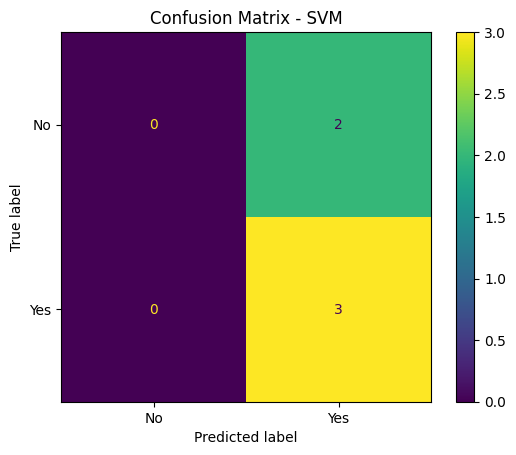

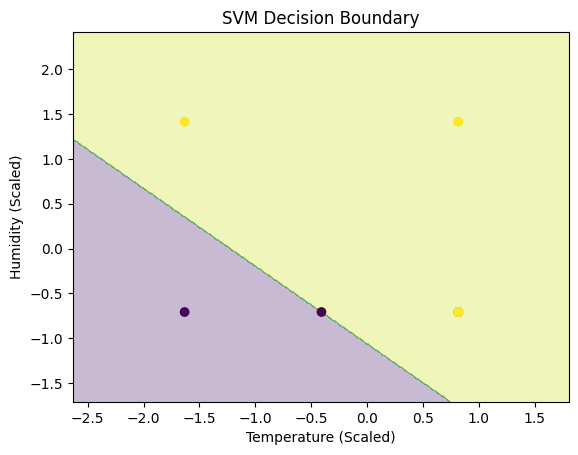

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# -----------------------------
# Step 1: Create Dataset
# -----------------------------

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast',
                'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],

    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild',
                    'Cool', 'Mild', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],

    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'High',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],

    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
             'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],

    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                   'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)


# -----------------------------
# Step 2: Encode Data
# -----------------------------

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])


# -----------------------------
# Step 3: Input & Output (2 Features Only)
# -----------------------------

X = df[['Temperature', 'Humidity']]   # For visualization
y = df['PlayTennis']


# -----------------------------
# Step 4: Train-Test Split
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# -----------------------------
# Step 5: Feature Scaling
# -----------------------------

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# -----------------------------
# Step 6: Create SVM Model
# -----------------------------

model = SVC(kernel='linear', C=1.0)


# -----------------------------
# Step 7: Train Model
# -----------------------------

model.fit(X_train, y_train)


# -----------------------------
# Step 8: Prediction
# -----------------------------

y_pred = model.predict(X_test)


# -----------------------------
# Step 9: Accuracy
# -----------------------------

acc = accuracy_score(y_test, y_pred)

print("Predicted:", y_pred)
print("Actual:   ", y_test.values)
print("Accuracy:", acc)


# -----------------------------
# Step 10: Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No", "Yes"]
)

disp.plot()
plt.title("Confusion Matrix - SVM")
plt.show()


# -----------------------------
# Step 11: Decision Boundary Graph
# -----------------------------

# Create mesh grid
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

# Predict for grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.3)

# Plot data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

plt.xlabel("Temperature (Scaled)")
plt.ylabel("Humidity (Scaled)")
plt.title("SVM Decision Boundary")

plt.show()

#12. kNN

Predicted: [1 1 0 1 1]
Actual:    [1 1 0 1 0]
Accuracy: 0.8

Confusion Matrix:
 [[1 1]
 [0 3]]


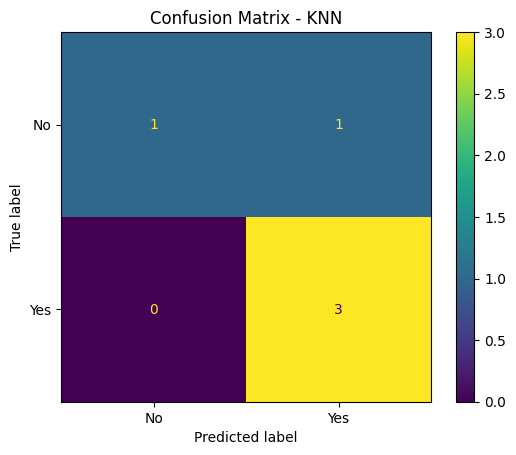

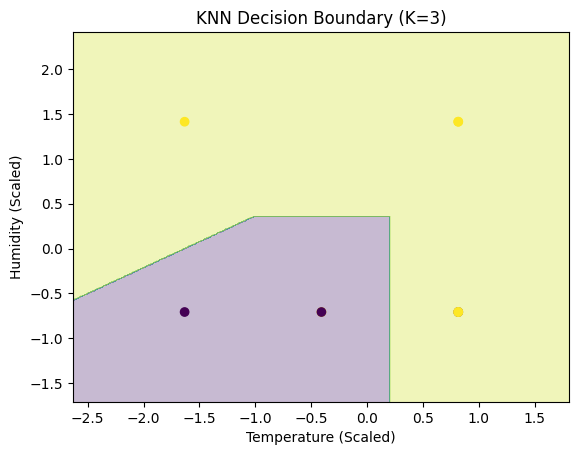

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# -----------------------------
# Step 1: Create Dataset
# -----------------------------

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast',
                'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],

    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild',
                    'Cool', 'Mild', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],

    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'High',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],

    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
             'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],

    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                   'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)


# -----------------------------
# Step 2: Encode Data
# -----------------------------

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])


# -----------------------------
# Step 3: Input & Output (2 Features)
# -----------------------------

X = df[['Temperature', 'Humidity']]
y = df['PlayTennis']


# -----------------------------
# Step 4: Train-Test Split
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# -----------------------------
# Step 5: Feature Scaling
# -----------------------------

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# -----------------------------
# Step 6: Create KNN Model
# -----------------------------

model = KNeighborsClassifier(
    n_neighbors=3,      # K = 3
    metric='euclidean'
)


# -----------------------------
# Step 7: Train Model
# -----------------------------

model.fit(X_train, y_train)


# -----------------------------
# Step 8: Prediction
# -----------------------------

y_pred = model.predict(X_test)


# -----------------------------
# Step 9: Accuracy
# -----------------------------

acc = accuracy_score(y_test, y_pred)

print("Predicted:", y_pred)
print("Actual:   ", y_test.values)
print("Accuracy:", acc)


# -----------------------------
# Step 10: Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No", "Yes"]
)

disp.plot()
plt.title("Confusion Matrix - KNN")
plt.show()


# -----------------------------
# Step 11: Decision Boundary
# -----------------------------

x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

plt.xlabel("Temperature (Scaled)")
plt.ylabel("Humidity (Scaled)")
plt.title("KNN Decision Boundary (K=3)")

plt.show()

# 13. Linear Regression

Mean Squared Error: 3.5066517171519123
R2 Score: 0.9896525031297156


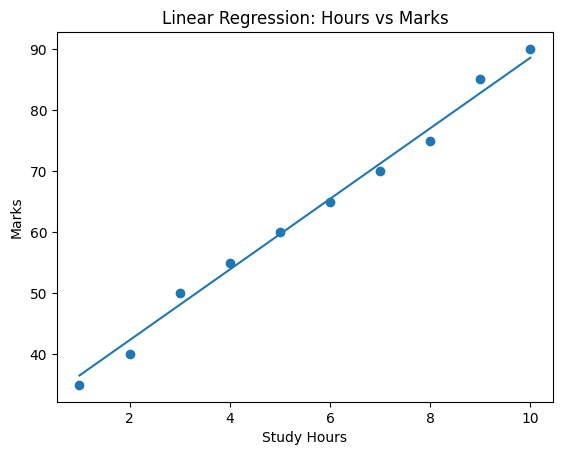

In [16]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# -----------------------------
# Step 1: Create Dataset
# -----------------------------

# Study hours vs Marks (Sample Data)
data = {
    'Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Marks': [35, 40, 50, 55, 60, 65, 70, 75, 85, 90]
}

df = pd.DataFrame(data)


# -----------------------------
# Step 2: Input & Output
# -----------------------------

X = df[['Hours']]    # Independent variable
y = df['Marks']      # Dependent variable


# -----------------------------
# Step 3: Train-Test Split
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# -----------------------------
# Step 4: Create Model
# -----------------------------

model = LinearRegression()


# -----------------------------
# Step 5: Train Model
# -----------------------------

model.fit(X_train, y_train)


# -----------------------------
# Step 6: Prediction
# -----------------------------

y_pred = model.predict(X_test)


# -----------------------------
# Step 7: Evaluation
# -----------------------------

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


# -----------------------------
# Step 8: Plot Graph
# -----------------------------

# Plot actual points
plt.scatter(X, y)

# Regression line
plt.plot(X, model.predict(X))

plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Linear Regression: Hours vs Marks")

plt.show()